# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


# importing voting classifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

# Import and Preprocess Data

In [2]:
# Import Dataset

df = pd.read_csv('Group_12_data_cleaned.csv') 
df.head()

,Unnamed: 0,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,monk
0,0,0.266074,-0.165620,0.320980,0.483299,0.000000,0.273364,0.371178,0.929823,0.251173,A
1,1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,A
2,2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,A
3,3,0.031541,0.297600,-3.210528,-0.583590,0.000000,-0.307984,0.710932,1.051693,0.594169,A
4,4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,F


In [3]:
# Check the statistics of dataset

df.describe()

,Unnamed: 0,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number
count,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,5216.250587,-0.038164,-0.057172,-0.009766,0.000115,0.204178,-0.004961,0.040236,-0.000634,0.002551
std,3011.965191,0.793469,0.480454,0.965513,0.999997,0.319982,0.968284,0.782209,0.995826,0.993220
min,0.000000,-3.498799,-2.426761,-3.210528,-5.440122,-1.078955,-4.128270,-4.876130,-4.247781,-4.238959
25%,2608.000000,-0.128929,-0.259834,0.064919,-0.527256,0.082961,-0.598658,-0.044076,-0.543914,-0.372457
50%,5216.000000,0.043885,-0.055704,0.214288,0.089437,0.261718,-0.058835,0.220177,0.108221,0.064084
75%,7824.500000,0.204355,0.203385,0.352988,0.643738,0.261718,0.564038,0.446679,0.648376,0.500624
max,10436.000000,4.969080,3.846334,5.491990,3.987152,1.066121,3.969075,3.995218,4.580832,3.244594


In [4]:
# Check data format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20867 entries, 0 to 20866
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              20867 non-null  int64  
 1   intercolumnar distance  20867 non-null  float64
 2   upper margin            20867 non-null  float64
 3   lower margin            20867 non-null  float64
 4   exploitation            20867 non-null  float64
 5   row number              20867 non-null  float64
 6   modular ratio           20867 non-null  float64
 7   interlinear spacing     20867 non-null  float64
 8   weight                  20867 non-null  float64
 9   peak number             20867 non-null  float64
 10  monk                    20867 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.8+ MB


In [5]:
# Drop the first index column

df = df.drop(columns=['Unnamed: 0'])
df.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,monk
0,0.266074,-0.165620,0.320980,0.483299,0.000000,0.273364,0.371178,0.929823,0.251173,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,A
3,0.031541,0.297600,-3.210528,-0.583590,0.000000,-0.307984,0.710932,1.051693,0.594169,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,F


In [6]:
# Check class distribution for monk

df['monk'].value_counts()

A    8572
F    3923
E    2190
I    1663
X    1044
H    1039
G     893
D     705
Y     533
C     206
W      89
B      10
Name: monk, dtype: int64

In [7]:
# Categorize monk variable to numerical categorical values

df['monk'].replace(['A', 'F','E','I','X','H','G','D','Y','C','W','B'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace=True)
df.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,monk
0,0.266074,-0.165620,0.320980,0.483299,0.000000,0.273364,0.371178,0.929823,0.251173,0
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0
3,0.031541,0.297600,-3.210528,-0.583590,0.000000,-0.307984,0.710932,1.051693,0.594169,0
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,1


# Train-Test Split (70:30)

In [8]:
# Split data to features and labels

X = df.drop(columns=['monk'])
y = df['monk']

In [9]:
# Split data to training and testing sets

x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

# Ensemble Model (models with no feature selection)

In [10]:
!pip install scikit-elm

In [11]:
from skelm import ELMClassifier

In [12]:
labels = df['monk'].unique()

In [13]:
model_1 = SGDClassifier(alpha = 0.01, loss = 'hinge', penalty = 'none') 
model_2 = LogisticRegression(C = 10.0, penalty = 'l2', solver = 'lbfgs')
model_3 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 3, weights = 'distance')  
model_4 = RandomForestClassifier(n_estimators = 1000, max_features = 'log2')
model_5 = SVC(C = 1000, gamma = 0.1)
model_6 = SVC(kernel='rbf',gamma=0.1, C=1000)
model_7 = MLPClassifier(hidden_layer_sizes=(20,20),activation = 'relu',random_state=33)
model_8 = ELMClassifier(classes = labels,n_neurons=200)

In [14]:
# Making the final model using voting classifier

final_model = VotingClassifier(
    estimators=[('SGD', model_1), 
                ('LogR', model_2), 
                ('KNN', model_3),
                ('RF', model_4),
                ('Linear SVM', model_5),
                ('Non-Linear SVM', model_6),
                ('MLP', model_7),
                ('ELM', model_8)], voting='hard') # meta classifier, 500 means SGD runs for 500 iterations

In [15]:
# training all the model on the train dataset
final_model.fit(x_train, y_train)

VotingClassifier(estimators=[('SGD', SGDClassifier(alpha=0.01, penalty='none')),
                             ('LogR', LogisticRegression(C=10.0)),
                             ('KNN',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=3,
                                                   weights='distance')),
                             ('RF',
                              RandomForestClassifier(max_features='log2',
                                                     n_estimators=1000)),
                             ('Linear SVM', SVC(C=1000, gamma=0.1)),
                             ('Non-Linear SVM', SVC(C=1000, gamma=0.1)),
                             ('MLP',
                              MLPClassifier(hidden_layer_sizes=(20, 20),
                                            random_state=33)),
                             ('ELM',
                              ELMClassifier(classes=array([ 0,  1,  5

In [16]:
# performing predictions on the test dataset
y_pred = final_model.predict(x_test)

In [17]:
final_model = classification_report(y_test, y_pred)
print(final_model)

final_model_2 = classification_report(y_test, y_pred, output_dict = True)
%store final_model_2

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      2608
           1       0.95      0.60      0.73      1208
           2       0.89      0.85      0.87       628
           3       0.99      0.94      0.97       485
           4       0.96      0.89      0.92       322
           5       0.98      0.65      0.78       330
           6       0.92      0.70      0.79       258
           7       0.98      0.73      0.83       198
           8       0.92      0.89      0.91       136
           9       0.97      0.56      0.71        63
          10       1.00      0.91      0.95        22
          11       1.00      1.00      1.00         3

    accuracy                           0.85      6261
   macro avg       0.94      0.81      0.86      6261
weighted avg       0.87      0.85      0.84      6261

Stored 'final_model_2' (dict)


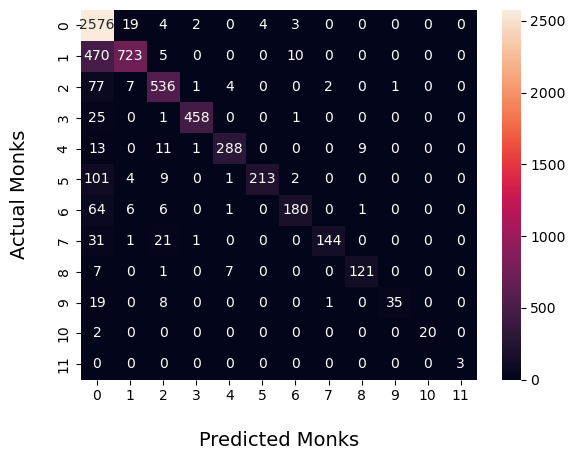

In [18]:
# Plot confusion matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(confusion_matrix, annot=True, fmt='d', )

# set x and y label
ax.set_xlabel("Predicted Monks", fontsize=14, labelpad=20)
ax.set_ylabel("Actual Monks", fontsize=14, labelpad=20)
plt.savefig('ensemble_cm.png')

# Comparison (with single models)

In [19]:
%store -r linear_clr_2
%store -r knn_clr_2
%store -r rf_clr_2
%store -r svm_clr_2
%store -r logr_clr_2
%store -r nl_svm_clr_2
%store -r elm_clr_2
%store -r mlp_clr_2
%store -r final_model_2

In [20]:
# Create empty lists for metrics

macro_avg_precision = []
macro_avg_recall = []
macro_avg_f1score = []
accuracy = []

wt_avg_precision = []
wt_avg_recall = []
wt_avg_f1score = []

In [21]:
# Create list of macro average precision values for all models

macro_avg_precision.append(linear_clr_2['macro avg'].get('precision'))
macro_avg_precision.append(knn_clr_2['macro avg'].get('precision'))
macro_avg_precision.append(rf_clr_2['macro avg'].get('precision'))
macro_avg_precision.append(svm_clr_2['macro avg'].get('precision'))
macro_avg_precision.append(logr_clr_2['macro avg'].get('precision'))
macro_avg_precision.append(nl_svm_clr_2['macro avg'].get('precision'))
macro_avg_precision.append(elm_clr_2['macro avg'].get('precision'))
macro_avg_precision.append(mlp_clr_2['macro avg'].get('precision'))
macro_avg_precision.append(final_model_2['macro avg'].get('precision'))

print(macro_avg_precision)

[0.32871366589675144, 0.8924928924361238, 0.9928893810748519, 0.8952441379060735, 0.38997004709579347, 0.8681659476706769, 0.6663668447364244, 0.7881652775708295, 0.9436757927302505]


In [22]:
# Create list of macro average recall values for all models

macro_avg_recall.append(linear_clr_2['macro avg'].get('recall'))
macro_avg_recall.append(knn_clr_2['macro avg'].get('recall'))
macro_avg_recall.append(rf_clr_2['macro avg'].get('recall'))
macro_avg_recall.append(svm_clr_2['macro avg'].get('recall'))
macro_avg_recall.append(logr_clr_2['macro avg'].get('recall'))
macro_avg_recall.append(nl_svm_clr_2['macro avg'].get('recall'))
macro_avg_recall.append(elm_clr_2['macro avg'].get('recall'))
macro_avg_recall.append(mlp_clr_2['macro avg'].get('recall'))
macro_avg_recall.append(final_model_2['macro avg'].get('recall'))

print(macro_avg_recall)

[0.28246672235602915, 0.8749216846365707, 0.9655788122045315, 0.8612686231919229, 0.30844977622037845, 0.8181911756903953, 0.37453246523943223, 0.7389940854032256, 0.8086030877470539]


In [23]:
# Create list of macro average f1 values for all models

macro_avg_f1score.append(linear_clr_2['macro avg'].get('f1-score'))
macro_avg_f1score.append(knn_clr_2['macro avg'].get('f1-score'))
macro_avg_f1score.append(rf_clr_2['macro avg'].get('f1-score'))
macro_avg_f1score.append(svm_clr_2['macro avg'].get('f1-score'))
macro_avg_f1score.append(logr_clr_2['macro avg'].get('f1-score'))
macro_avg_f1score.append(nl_svm_clr_2['macro avg'].get('f1-score'))
macro_avg_f1score.append(elm_clr_2['macro avg'].get('f1-score'))
macro_avg_f1score.append(mlp_clr_2['macro avg'].get('f1-score'))
macro_avg_f1score.append(final_model_2['macro avg'].get('f1-score'))

print(macro_avg_f1score)

[0.28247486007339173, 0.8812059479350798, 0.9782286512693511, 0.8769538022929879, 0.3193770515333701, 0.8389934673999332, 0.40854398137152953, 0.7526800732598503, 0.8607600008849977]


In [24]:
# Create list of macro average f1 values for all models

accuracy.append(linear_clr_2['accuracy'])
accuracy.append(knn_clr_2['accuracy'])
accuracy.append(rf_clr_2['accuracy'])
accuracy.append(svm_clr_2['accuracy'])
accuracy.append(logr_clr_2['accuracy'])
accuracy.append(nl_svm_clr_2['accuracy'])
accuracy.append(elm_clr_2['accuracy'])
accuracy.append(mlp_clr_2['accuracy'])
accuracy.append(final_model_2['accuracy'])

print(accuracy)

[0.5126976521322473, 0.877176169940904, 0.9900974285257946, 0.8439546398338923, 0.5547037214502476, 0.8335729116754512, 0.6369589522440505, 0.7779907363041048, 0.8460309854655805]


In [25]:
# Create list of weighted average precision values for all models

wt_avg_precision.append(linear_clr_2['macro avg'].get('precision'))
wt_avg_precision.append(knn_clr_2['macro avg'].get('precision'))
wt_avg_precision.append(rf_clr_2['macro avg'].get('precision'))
wt_avg_precision.append(svm_clr_2['macro avg'].get('precision'))
wt_avg_precision.append(logr_clr_2['macro avg'].get('precision'))
wt_avg_precision.append(nl_svm_clr_2['macro avg'].get('precision'))
wt_avg_precision.append(elm_clr_2['macro avg'].get('precision'))
wt_avg_precision.append(mlp_clr_2['macro avg'].get('precision'))
wt_avg_precision.append(final_model_2['macro avg'].get('precision'))

print(wt_avg_precision)

[0.32871366589675144, 0.8924928924361238, 0.9928893810748519, 0.8952441379060735, 0.38997004709579347, 0.8681659476706769, 0.6663668447364244, 0.7881652775708295, 0.9436757927302505]


In [26]:
# Create list of weighted average recall values for all models

wt_avg_recall.append(linear_clr_2['macro avg'].get('recall'))
wt_avg_recall.append(knn_clr_2['macro avg'].get('recall'))
wt_avg_recall.append(rf_clr_2['macro avg'].get('recall'))
wt_avg_recall.append(svm_clr_2['macro avg'].get('recall'))
wt_avg_recall.append(logr_clr_2['macro avg'].get('recall'))
wt_avg_recall.append(nl_svm_clr_2['macro avg'].get('recall'))
wt_avg_recall.append(elm_clr_2['macro avg'].get('recall'))
wt_avg_recall.append(mlp_clr_2['macro avg'].get('recall'))
wt_avg_recall.append(final_model_2['macro avg'].get('recall'))

print(wt_avg_recall)

[0.28246672235602915, 0.8749216846365707, 0.9655788122045315, 0.8612686231919229, 0.30844977622037845, 0.8181911756903953, 0.37453246523943223, 0.7389940854032256, 0.8086030877470539]


In [27]:
# Create list of weighted average f1 values for all models

wt_avg_f1score.append(linear_clr_2['macro avg'].get('f1-score'))
wt_avg_f1score.append(knn_clr_2['macro avg'].get('f1-score'))
wt_avg_f1score.append(rf_clr_2['macro avg'].get('f1-score'))
wt_avg_f1score.append(svm_clr_2['macro avg'].get('f1-score'))
wt_avg_f1score.append(logr_clr_2['macro avg'].get('f1-score'))
wt_avg_f1score.append(nl_svm_clr_2['macro avg'].get('f1-score'))
wt_avg_f1score.append(elm_clr_2['macro avg'].get('f1-score'))
wt_avg_f1score.append(mlp_clr_2['macro avg'].get('f1-score'))
wt_avg_f1score.append(final_model_2['macro avg'].get('f1-score'))

print(wt_avg_f1score)

[0.28247486007339173, 0.8812059479350798, 0.9782286512693511, 0.8769538022929879, 0.3193770515333701, 0.8389934673999332, 0.40854398137152953, 0.7526800732598503, 0.8607600008849977]


In [28]:
Model = ['Linear (no feature selection)', 'KNN (no feature selection)', 'Random Forest (no feature selection)', 'Linear SVM (no feature selection)', 'Logistic (no feature selection)', 'Non-Linear SVM (no feature selection)', 'ELM (no feature selection)', 'MLP (no feature selection)', 'Ensemble']

In [29]:
df = pd.DataFrame(list(zip(Model, macro_avg_precision, macro_avg_recall, macro_avg_f1score, wt_avg_precision, wt_avg_recall, wt_avg_f1score, accuracy)),
               columns =['Model', 'Macro Average Precision', 'Macro Average Recall', 'Macro Average F1-Score', 'Weighted Average Precision', 'Wieghted Average Recall', 'Weighted Average F1-Score', 'Accuracy'])
df = df.set_index('Model')
df

,Macro Average Precision,Macro Average Recall,Macro Average F1-Score,Weighted Average Precision,Wieghted Average Recall,Weighted Average F1-Score,Accuracy
Model,,,,,,,
Linear (no feature selection),0.328714,0.282467,0.282475,0.328714,0.282467,0.282475,0.512698
KNN (no feature selection),0.892493,0.874922,0.881206,0.892493,0.874922,0.881206,0.877176
Random Forest (no feature selection),0.992889,0.965579,0.978229,0.992889,0.965579,0.978229,0.990097
Linear SVM (no feature selection),0.895244,0.861269,0.876954,0.895244,0.861269,0.876954,0.843955
Logistic (no feature selection),0.389970,0.308450,0.319377,0.389970,0.308450,0.319377,0.554704
Non-Linear SVM (no feature selection),0.868166,0.818191,0.838993,0.868166,0.818191,0.838993,0.833573
ELM (no feature selection),0.666367,0.374532,0.408544,0.666367,0.374532,0.408544,0.636959
MLP (no feature selection),0.788165,0.738994,0.752680,0.788165,0.738994,0.752680,0.777991
Ensemble,0.943676,0.808603,0.860760,0.943676,0.808603,0.860760,0.846031


# Confusion Matrix

## Linear Model

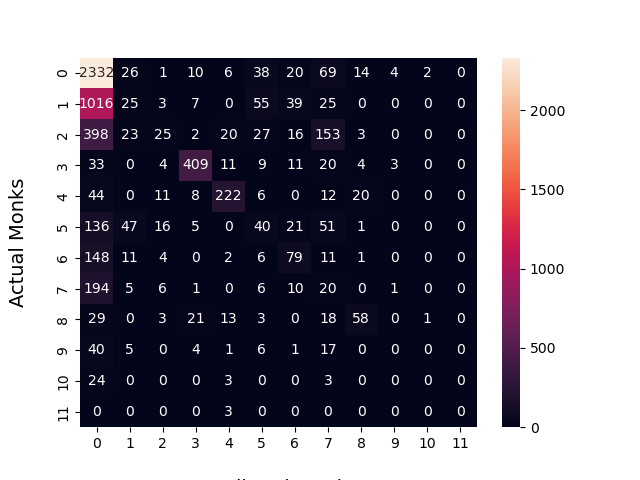

In [30]:
Image(filename='linear_cm.png') 

## KNN Model

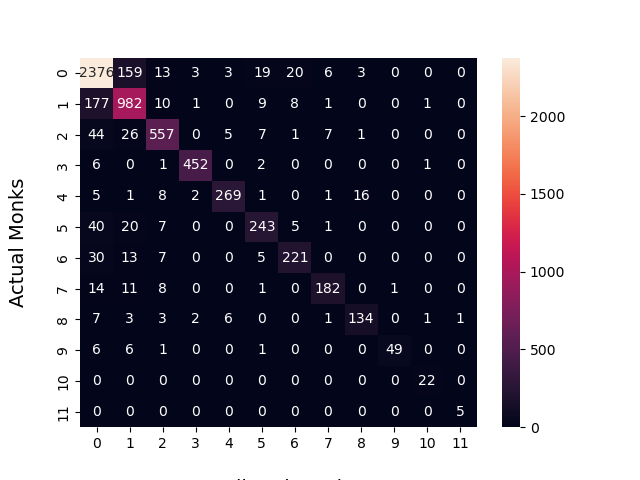

In [31]:
Image(filename='knn_cm.png') 

## Random Forests

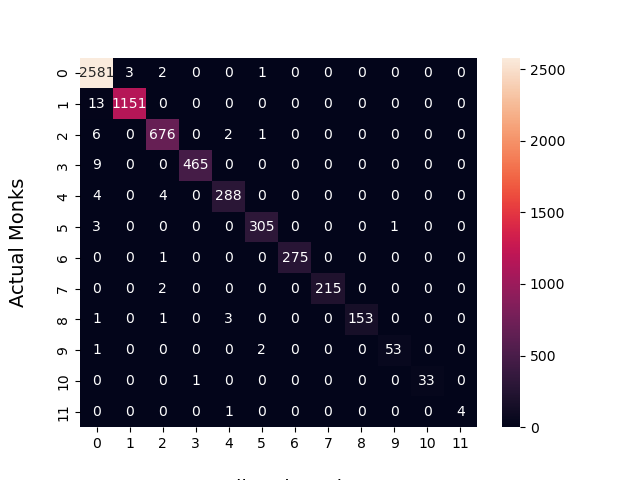

In [32]:
Image(filename='rf_cm.png')

## Linear SVM

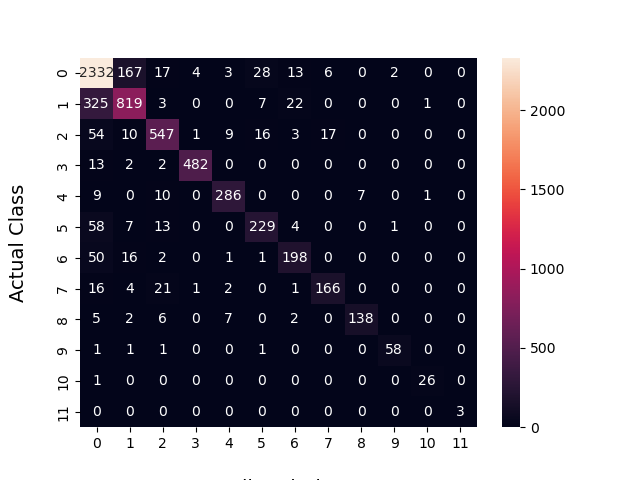

In [33]:
Image(filename='svm_cm.png') 

## Logistic Regression Model

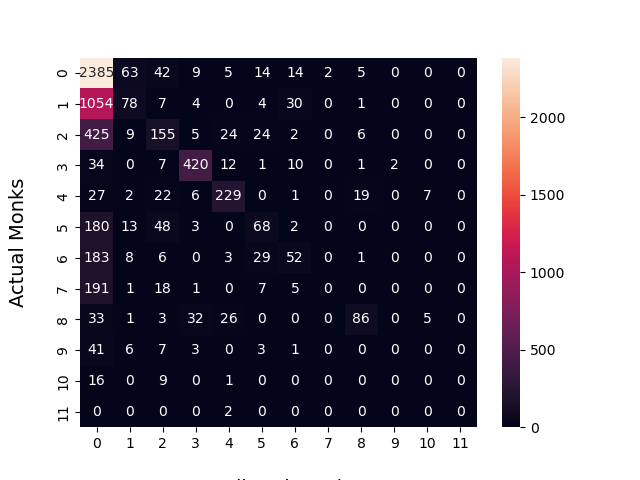

In [34]:
Image(filename='logr_cm.png')

## Non-Linear SVM Model

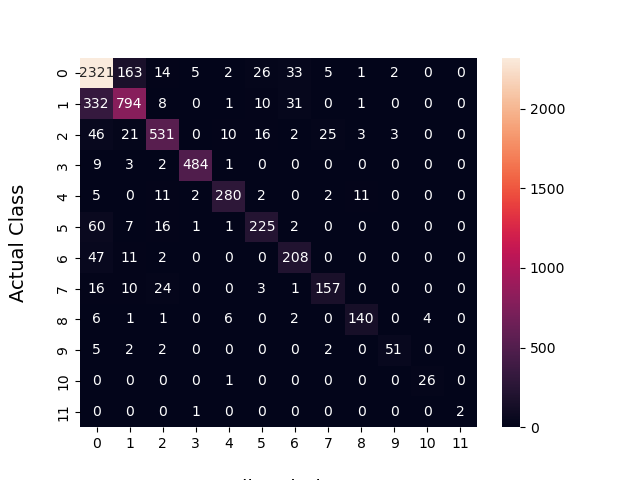

In [35]:
Image(filename='nl_svm_cm.png')

## ELM Model

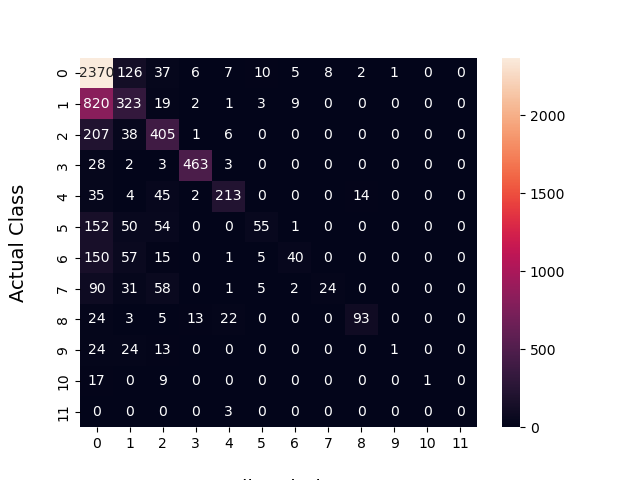

In [36]:
Image(filename='elm.png')

## Deep Learning Model (MLP)

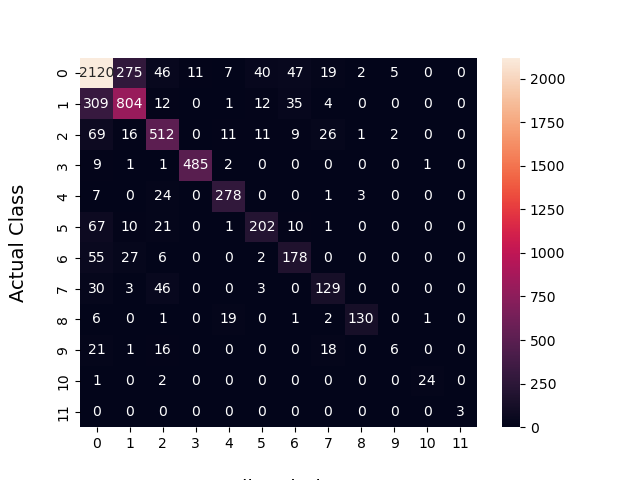

In [37]:
Image(filename='mlp_cm.png')

## Ensemble Model

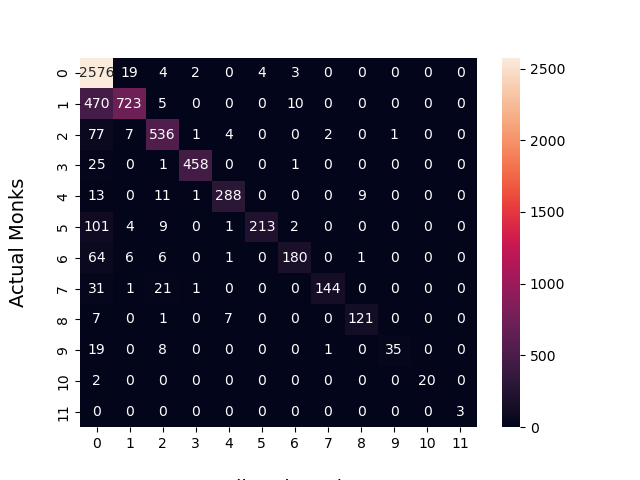

In [38]:
Image(filename='ensemble_cm.png')

In [40]:
final_model_2 = StackingClassifier(
    estimators=[('SGD', model_1), 
                ('LogR', model_2), 
                ('KNN', model_3),
                ('RF', model_4),
                ('Linear SVM', model_5),
                ('Non-Linear SVM', model_6),
                ('MLP', model_7),
                ('ELM', model_8)],
final_estimator=RandomForestClassifier(), cv=5, passthrough=True)